In [1]:
import os
for dirname, _, filenames in os.walk():
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **TRAIN DATA ANALYSIS**

In [9]:
train=pd.read_csv("train (1).csv")
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [10]:
train.shape

(700, 2)

In [12]:
train.isnull().any()

x    False
y     True
dtype: bool

In [13]:
train.index[train.isnull().any(axis=1)]

Int64Index([213], dtype='int64')

In [15]:
train['y'].mean()

49.9398691704578

In [16]:
train=train.fillna(train.mean())
train.iloc[213]

x    3530.157369
y      49.939869
Name: 213, dtype: float64

In [17]:
train.isnull().any()

x    False
y    False
dtype: bool

In [19]:
train.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


# **TEST DATA ANALYSIS**

In [22]:
test=pd.read_csv("test.csv")
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [23]:
test.isnull().any()

x    False
y    False
dtype: bool

In [24]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [26]:
test.shape

(300, 2)

# **LINEAR REGRESSION**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
X_train = np.array(train.iloc[:, :-1].values)
y_train = np.array(train.iloc[:, :1].values)
X_test = np.array(train.iloc[:, :-1].values)
y_test = np.array(train.iloc[:, :1].values)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[0.]
[[1.]]


In [34]:
pred = lin_reg.predict(X_test)

In [35]:
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error:{mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error:0.0 (0.0%)


In [36]:
score = lin_reg.score(X_train, y_train)
print ('Model determinatinon: ', score)

Model determinatinon:  1.0


# **Data visualization**

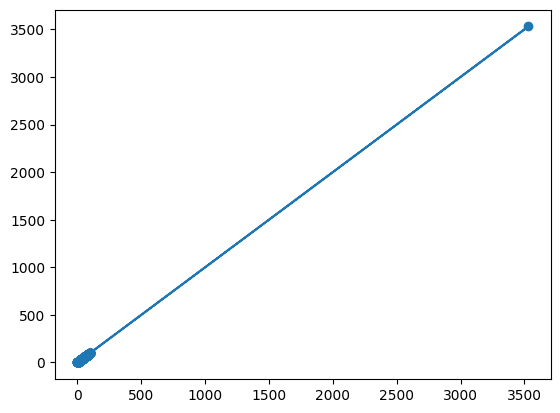

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred)